In [30]:
! pip install librosa --upgrade


     |████████████████████████████████| 253 kB 6.3 MB/s            
     |████████████████████████████████| 1.2 MB 74.7 MB/s            
     |████████████████████████████████| 1.2 MB 92.9 MB/s            
  Attempting uninstall: soundfile
    Found existing installation: SoundFile 0.10.3.post1
    Uninstalling SoundFile-0.10.3.post1:
      Successfully uninstalled SoundFile-0.10.3.post1
  Attempting uninstall: librosa
    Found existing installation: librosa 0.8.1
    Uninstalling librosa-0.8.1:
      Successfully uninstalled librosa-0.8.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
! wget -r -N -c -np https://physionet.org/files/circor-heart-sound/1.0.3/

--2023-11-06 16:07:24--  https://physionet.org/files/circor-heart-sound/1.0.3/
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘physionet.org/files/circor-heart-sound/1.0.3/index.html’

physionet.org/files     [ <=>                ]     825  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2023-11-06 16:07:24 (50.4 MB/s) - ‘physionet.org/files/circor-heart-sound/1.0.3/index.html’ saved [825]

Loading robots.txt; please ignore errors.
--2023-11-06 16:07:24--  https://physionet.org/robots.txt
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 22 [text/plain]
Saving to: ‘physionet.org/robots.txt’

physionet.org/robot 100%[===================>]      22  --.-KB/s    in 0s      

2023-11-06 16:07:24 (3.51 MB/s) - ‘physionet.org/robots.txt

In [31]:
import librosa
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import joblib

import librosa
from IPython.display import Audio
import IPython.display as ipd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [18]:
root = "/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/training_data/"

In [21]:
original_audio_file = root + "81501_MV.wav"
y, sr = librosa.load(original_audio_file, sr=None)
sr

4000

In [23]:
import glob


files = sorted(glob.glob(root + '**/*.wav', recursive=True))
print(len(files))
print(files[0])


3163
/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/training_data/13918_AV.wav


In [54]:
import librosa
import librosa.display
import numpy as np

def wav_info(file):
    # Load the audio file
    data, sr = librosa.load(file, sr=4000)
    print(file)
    print(f"data length: {len(data)}, sampling rate: {sr}")
    ipd.display(ipd.Audio(data, rate=sr)) # wav 파일 재생
    
    # Create a figure and a set of subplots
    fig,ax = plt.subplots(1,3,figsize=(12,3))
    
    # Waveform
    librosa.display.waveshow(data, sr=sr, ax=ax[0])
    
    # Mel spectrogram
    mel = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(mel, ref=np.max), y_axis='mel', x_axis='time', ax=ax[1])
    
    # MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel', ax=ax[2])
    
    plt.tight_layout()
    plt.show()


/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/training_data/50763_PV.wav
data length: 98240, sampling rate: 4000


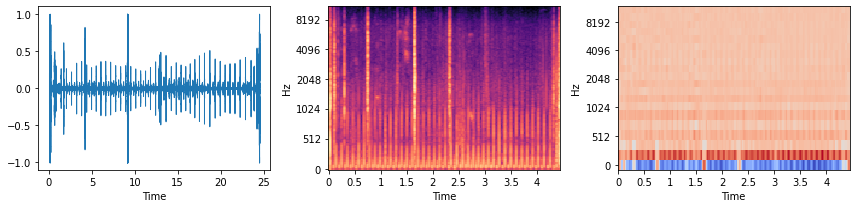

/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/training_data/85176_PV.wav
data length: 64000, sampling rate: 4000


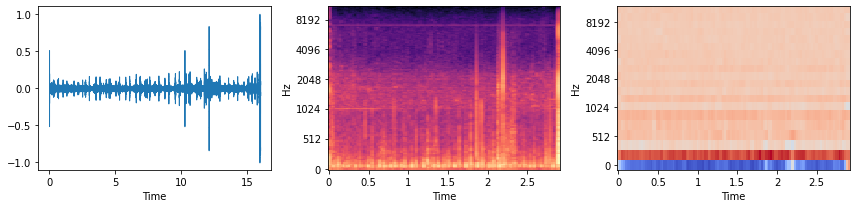

/aiffel/aiffel/AAAPrac/TON/physionet.org/files/circor-heart-sound/1.0.3/training_data/85069_TV.wav
data length: 45376, sampling rate: 4000


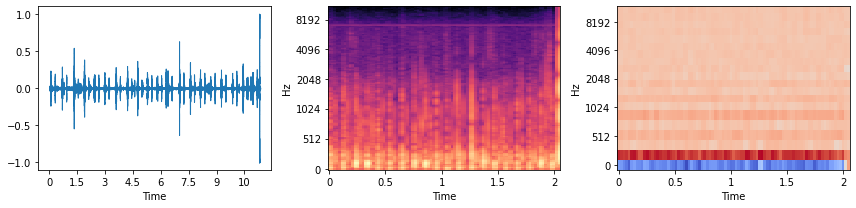

In [55]:

num = np.random.randint(0, 3163, 3)
for file in np.array(files)[num]:
    wav_info(file)


In [57]:
# annotation = 0 제거
import soundfile as sf  # soundfile 라이브러리 import
import os
import librosa
import csv

def cut_wav(wav_path, tsv_path, sample_rate):
    """
    annotation이 0인 구간의 wav 파일 범위를 잘라냅니다.

    Args:
        wav_path: wav 파일 경로
        tsv_path: annotation 파일 경로
        sample_rate: wav 파일의 샘플 속도

    Returns:
        None
    """

    # 새로운 WAV 파일 저장 경로 및 파일명 설정
    output_path = os.path.join(os.path.dirname(wav_path), "../new_data", os.path.basename(wav_path))

    # 새로운 WAV 파일 생성을 위한 빈 리스트
    new_wav_data = []

    with open(tsv_path, "r") as tsvfile:
        reader = csv.reader(tsvfile, delimiter="\t")
        for row in reader:
            start_time = float(row[0])
            end_time = float(row[1])
            label = int(row[2])

            # annotation이 0이 아닌 경우, 해당 구간을 새로운 WAV 파일에 추가
            if label != 0:
                start_index = int(start_time * sample_rate)
                end_index = int(end_time * sample_rate)
                new_wav_data.extend(librosa.load(wav_path)[0][start_index:end_index])

    # 모든 구간을 포함하는 WAV 파일 저장
    sf.write(output_path, new_wav_data, sample_rate)


In [ ]:
folder_path = './'
sample_rate = 4000

for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
        wav_file_path = os.path.join(folder_path, filename)
        tsv_file_path = os.path.splitext(wav_file_path)[0] + ".tsv"
        cut_wav(wav_file_path, tsv_file_path, sample_rate)


In [ ]:
# tsv 0 제거
import os
import csv

def cut_tsv(input_tsv_path, output_tsv_path):
    """
    annotation이 0인 구간을 제거하고 시간대를 업데이트한 TSV 파일을 생성합니다.

    Args:
        input_tsv_path: 입력 TSV 파일 경로
        output_tsv_path: 출력 TSV 파일 경로

    Returns:
        None
    """
    # TSV 파일 이름 추출 (기존 파일 이름을 그대로 사용)
    tsv_filename = os.path.basename(input_tsv_path)

    # 출력 TSV 파일 경로 생성
    output_tsv_path = os.path.join(output_tsv_path, tsv_filename)

    # TSV 파일 읽기
    with open(input_tsv_path, "r") as tsvfile:
        reader = csv.reader(tsvfile, delimiter="\t")
        rows = [row for row in reader]

    # 새로운 시작 및 종료 시간을 계산하는 변수 초기화
    new_start_time = 0
    new_rows = []

    for row in rows:
        start_time = float(row[0])
        end_time = float(row[1])
        annotation = int(row[2])

        # annotation이 0이 아닌 경우
        if annotation != 0:
            # 현재 구간 추가 (시간대 업데이트)
            new_end_time = new_start_time + (end_time - start_time)
            new_rows.append([new_start_time, new_end_time, annotation])
            new_start_time = new_end_time  # 시작 시간 업데이트

    # 새로운 TSV 파일 작성
    with open(output_tsv_path, "w", newline='') as tsvfile:
        writer = csv.writer(tsvfile, delimiter="\t")
        for row in new_rows:
            writer.writerow(row)


In [ ]:
output_tsv_path = '../new_data'

# 모든 TSV 파일에 대해 함수 호출
for filename in os.listdir(folder_path):
    if filename.endswith(".tsv"):
        input_tsv_path = os.path.join(folder_path, filename)
        cut_tsv(input_tsv_path, output_tsv_path)

In [ ]:
new_root = '../new_data/'
new_files = sorted(glob.glob(new_root + '**/*.wav', recursive=True))
print(len(new_files))
print(new_files[0])


In [ ]:

num = np.random.randint(0, 3163, 3)
for file in np.array(new_files)[num]:
    wav_info(file)


In [ ]:
from scipy.signal import resample

def resample_signal(file, new_sr, old_sr):
    """
    parameter:
    - file: numpy 배열 형태 입력신호
    - new_sr: 새로운 sample rate
    - old_sr: 원래 sample rate
    
    returns:
    - resampling된 신호(numpy)
    """
    
    # 리샘플링 비율 계산
    resampling_ratio = new_sr / old_sr
    
    # 리샘플링
    resampled_file = resample(file, int(len(file) * resampling_ratio))
    
    return resampled_file
    